In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/kaggle/input/diabetes-prediction-in-america-dataset/diabetes_dataset.csv"  # Update if needed
df = pd.read_csv('diabetes_dataset.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Age  Gender Ethnicity  Income   BMI  Blood_Pressure  Cholesterol  \
0   69  Female     Other   39557  38.2            94.6        252.9   
1   32    Male     Black   90663  33.6           167.0        282.6   
2   89    Male     White  116180  39.4           100.6        106.8   
3   78    Male     Other   73059  40.6           111.1        169.7   
4   38  Female     White   35389  29.7           143.3        296.5   

   Exercise_Hours_Per_Week  Alcohol_Consumption_Per_Week Smoking_Status  ...  \
0                      3.3                             4          Never  ...   
1                      4.6                             7          Never  ...   
2                      6.1                             5         Former  ...   
3                      7.4                             9          Never  ...   
4                      2.6                             6          Never  ...   

   Insulin_Resistance  Heart_Disease_History  Physical_Activity

C:\Users\arjun\AppData\Local\Temp\ipykernel_20388\3658396165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_Diagnosis', data=df, palette="coolwarm")


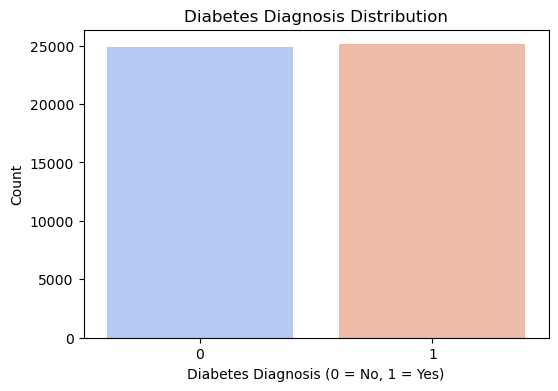

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_Diagnosis', data=df, palette="coolwarm")
plt.title("Diabetes Diagnosis Distribution")
plt.xlabel("Diabetes Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

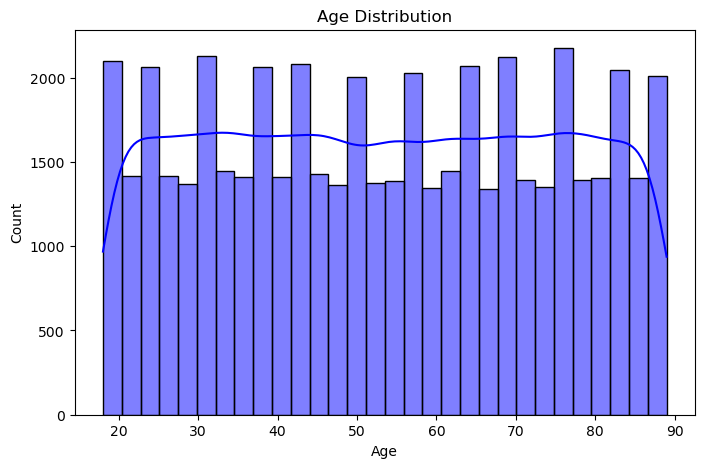

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

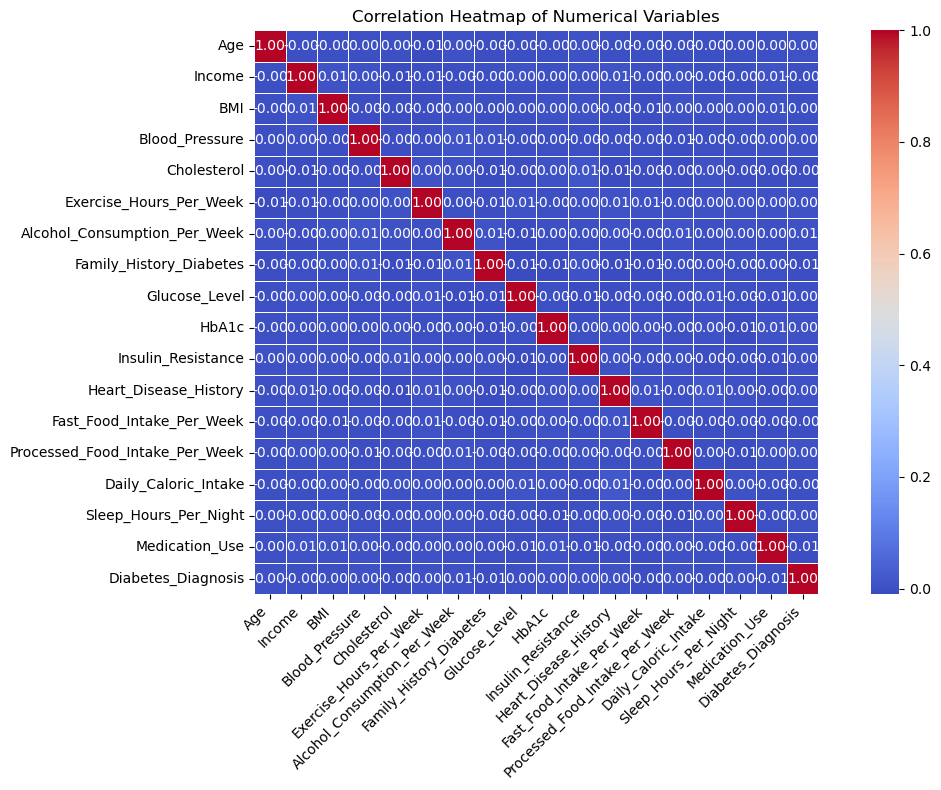

- Age
- Income
- BMI
- Blood_Pressure
- Cholesterol
- Exercise_Hours_Per_Week
- Alcohol_Consumption_Per_Week
- Family_History_Diabetes
- Glucose_Level
- HbA1c
- Insulin_Resistance
- Heart_Disease_History
- Fast_Food_Intake_Per_Week
- Processed_Food_Intake_Per_Week
- Daily_Caloric_Intake
- Sleep_Hours_Per_Night
- Medication_Use
- Diabetes_Diagnosis


In [6]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            square=True)

plt.title("Correlation Heatmap of Numerical Variables")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

for col in numeric_df.columns:
    print(f"- {col}")

C:\Users\arjun\AppData\Local\Temp\ipykernel_20388\3162805265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diabetes_Diagnosis", y="BMI", data=df, palette="Set2")


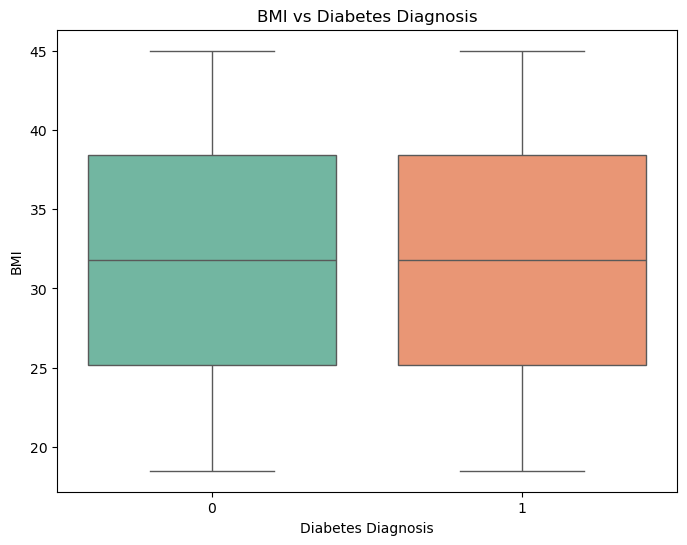

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Diabetes_Diagnosis", y="BMI", data=df, palette="Set2")
plt.title("BMI vs Diabetes Diagnosis")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("BMI")
plt.show()

Diabetes_Diagnosis                1.000000
Alcohol_Consumption_Per_Week      0.005165
Age                               0.004277
Blood_Pressure                    0.004124
HbA1c                             0.003221
Heart_Disease_History             0.002578
Exercise_Hours_Per_Week           0.002071
Insulin_Resistance                0.001992
Sleep_Hours_Per_Night             0.001676
Processed_Food_Intake_Per_Week    0.001347
Name: Diabetes_Diagnosis, dtype: float64


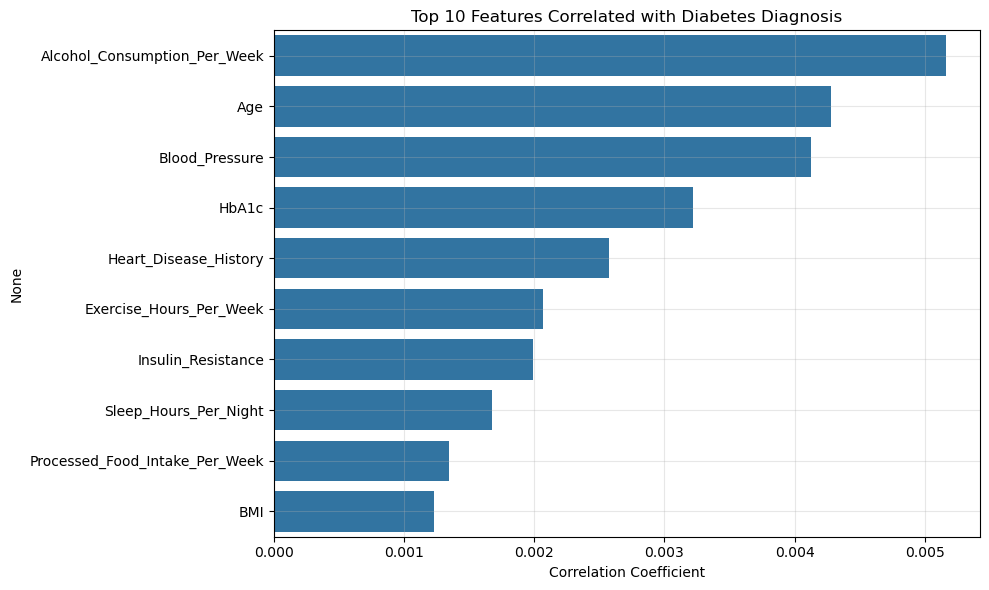

Diabetes_Diagnosis                1.000 (Strong)
Alcohol_Consumption_Per_Week        0.005 (Weak)
Age                                 0.004 (Weak)
Blood_Pressure                      0.004 (Weak)
HbA1c                               0.003 (Weak)
Heart_Disease_History               0.003 (Weak)
Exercise_Hours_Per_Week             0.002 (Weak)
Insulin_Resistance                  0.002 (Weak)
Sleep_Hours_Per_Night               0.002 (Weak)
Processed_Food_Intake_Per_Week      0.001 (Weak)
Name: Diabetes_Diagnosis, dtype: object


In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()["Diabetes_Diagnosis"].sort_values(ascending=False)
print(correlation.head(10))

plt.figure(figsize=(10, 6))
top_features = correlation[1:11]  
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Features Correlated with Diabetes Diagnosis")
plt.xlabel("Correlation Coefficient")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.5 else 'Moderate' if abs(x) > 0.3 else 'Weak'})")
      .head(10))